In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [38]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [40]:
!pip install text2emotion

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.0 MB/s eta 0:00:00


In [46]:
!pip install emoji==1.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170282 sha256=2038b32aef95f091f9a9377cff57c3cfa9a06a9db7a491ca577efea2bab0b6b8
  Stored in directory: /root/.cache/pip/wheels/85/e1/6e/02053f229e270406b51792d6d511a55338c818642599fa9cfe
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.1
    Uninstalling emoji-2.14.1:
      Successfully uninstalled emoji-2.14.1


In [2]:
import pandas as pd
import os
import json
from tqdm import tqdm
from glob import glob

In [4]:
import tarfile

file_path = '/content/phemernrdataset.tar.bz2'
extract_path = '/content/phemernrdataset'

with tarfile.open(file_path, 'r:bz2') as tar:
    tar.extractall(path=extract_path)

In [3]:
def load_pheme5_original(main_folder):
    data = []

    # Traverse event folders
    for event_name in os.listdir(main_folder):
        event_path = os.path.join(main_folder, event_name)
        if not os.path.isdir(event_path):
            continue

        for label_type in ['rumours', 'non-rumours']:
            label_path = os.path.join(event_path, label_type)
            if not os.path.isdir(label_path):
                continue

            for tweet_folder in os.listdir(label_path):
                tweet_dir = os.path.join(label_path, tweet_folder, 'source-tweet')
                if not os.path.exists(tweet_dir):
                    continue

                # Load JSON file in the source-tweet folder
                for json_file in glob(os.path.join(tweet_dir, '*.json')):
                    try:
                        with open(json_file, 'r', encoding='utf-8') as f:
                            tweet = json.load(f)

                        user = tweet.get('user', {})
                        data.append({
                            'id': tweet.get('id'),
                            'text': tweet.get('text'),
                            'created_at': tweet.get('created_at'),
                            'label': label_type,
                            'followers_count': user.get('followers_count'),
                            'friends_count': user.get('friends_count'),
                            'verified': user.get('verified'),
                            'retweet_count': tweet.get('retweet_count'),
                            'favorite_count': tweet.get('favorite_count')
                        })
                    except Exception as e:
                        print(f"Error reading {json_file}: {e}")

    df = pd.DataFrame(data)
    return df

In [4]:
pheme_df = load_pheme5_original(r'/content/phemernrdataset/pheme-rnr-dataset')
pheme_df.head()

,id,text,created_at,label,followers_count,friends_count,verified,retweet_count,favorite_count
0,544411097797644288,Police have identified who the gunman is. He i...,Mon Dec 15 08:38:15 +0000 2014,rumours,3951,1504,False,447,130
1,544373593841623040,2 more people have fled from Sydney cafe where...,Mon Dec 15 06:09:13 +0000 2014,rumours,21719174,109,True,488,290
2,544317438079139841,HADLEY confirms he is speaking to a hostage in...,Mon Dec 15 02:26:04 +0000 2014,rumours,26763,1146,True,126,17
3,544277860555710464,ISIS -holding a Cafe hostage in Sydney- forcin...,Sun Dec 14 23:48:48 +0000 2014,rumours,171398,537,False,102,100
4,544409432600223744,A hostage runs towards a police officer outsid...,Mon Dec 15 08:31:38 +0000 2014,rumours,1640970,49,True,108,57


# Preprocessing

In [5]:
import re
import string
from nltk.corpus import stopwords

In [6]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_texts(text):
    text = re.sub(r"that’s","that is",text)
    text = re.sub(r"there’s","there is",text)
    text = re.sub(r"what’s","what is",text)
    text = re.sub(r"where’s","where is",text)
    text = re.sub(r"it’s","it is",text)
    text = re.sub(r"who’s","who is",text)
    text = re.sub(r"i’m","i am",text)
    text = re.sub(r"she’s","she is",text)
    text = re.sub(r"he’s","he is",text)
    text = re.sub(r"they’re","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain’t","am not",text)
    text = re.sub(r"wouldn’t","would not",text)
    text = re.sub(r"shouldn’t","should not",text)
    text = re.sub(r"can’t","can not",text)
    text = re.sub(r"couldn’t","could not",text)
    text = re.sub(r"won’t","will not",text)
    text = re.sub(r"didn’t","did not",text)
    text = re.sub(r"doesn’t","does not",text)
    # remove URL
    text = re.sub(r"http\S+", " ", text)
#     # Remove usernames
    text = re.sub(r"@[^\s]+[\s]?",' ',text)
#     # remove special characters
    text = re.sub('[^ a-zA-Z0-9]', ' ', text)
#     # remove Numbers
    text = re.sub('[0-9]', '', text)
    text = re.sub(' +', ' ',text)
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'#\S+', ' ', text)
    text = re.sub(r'\'\w+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)

    return text

In [7]:
pheme_df['text'] = pheme_df['text'].apply(clean_texts)

In [8]:
stops = set(stopwords.words("english"))
pheme_df['text']=pheme_df['text'].str.lower()
pheme_df['text']=pheme_df['text'].apply(lambda x:' '.join([word for word in x.split() if word.lower() not in (stops)]))

In [9]:
pheme_df['label'] = pheme_df['label'].map({'non-rumours': 0, 'rumours': 1})

# BERT

In [12]:
from transformers import BertTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import pandas as pd

In [13]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
# Text tokenization function
def tokenize_text(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [15]:
# Normalize user features
user_features = ['followers_count', 'friends_count', 'verified', 'retweet_count', 'favorite_count']
pheme_df[user_features] = pheme_df[user_features].fillna(0)
pheme_df['verified'] = pheme_df['verified'].astype(int)

In [16]:
scaler = StandardScaler()
pheme_df[user_features] = scaler.fit_transform(pheme_df[user_features])

In [17]:
train_df, test_df = train_test_split(pheme_df, test_size=0.2, random_state=42, stratify=pheme_df['label'])

In [19]:
import torch.nn as nn
from transformers import BertModel
from torch.utils.data import DataLoader
from torch.optim import AdamW
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import torch.nn.functional as F

In [20]:
class RumorDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()
        self.user_feats = dataframe[user_features].values
        self.encodings = tokenize_text(self.texts)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['user_feats'] = torch.tensor(self.user_feats[idx], dtype=torch.float)
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = RumorDataset(train_df)
test_dataset = RumorDataset(test_df)

In [21]:
class BertWithUserFeatures(nn.Module):
    def __init__(self):
        super(BertWithUserFeatures, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.user_fc = nn.Linear(len(user_features), 32)
        self.classifier = nn.Linear(self.bert.config.hidden_size + 32, 2)

    def forward(self, input_ids, attention_mask, user_feats):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        user_emb = self.user_fc(user_feats)
        combined = torch.cat((cls_output, user_emb), dim=1)
        combined = self.dropout(combined)
        logits = self.classifier(combined)
        return logits

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertWithUserFeatures().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [23]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [24]:
# Training loop
for epoch in range(3):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        user_feats = batch['user_feats'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, user_feats)

        loss = nn.CrossEntropyLoss()(outputs, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Collect predictions for accuracy
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.detach().cpu().numpy())
        all_labels.extend(labels.detach().cpu().numpy())

        # Update progress bar
        loop.set_postfix(loss=loss.item())

    # Epoch stats
    avg_loss = total_loss / len(train_loader)
    epoch_acc = accuracy_score(all_labels, all_preds)

    print(f"\nEpoch {epoch+1} Loss: {avg_loss:.4f} Training Accuracy: {epoch_acc:.4f}\n")

Epoch 1: 100%|██████████| 291/291 [00:31<00:00,  9.19it/s, loss=0.982]



Epoch 1 Loss: 0.4555 Training Accuracy: 0.7847



Epoch 2: 100%|██████████| 291/291 [00:32<00:00,  9.05it/s, loss=0.0462]



Epoch 2 Loss: 0.2958 Training Accuracy: 0.8750



Epoch 3: 100%|██████████| 291/291 [00:34<00:00,  8.51it/s, loss=0.00614]


Epoch 3 Loss: 0.1935 Training Accuracy: 0.9259



In [25]:
# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        user_feats = batch['user_feats'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask, user_feats)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [26]:
# Accuracy
acc = accuracy_score(all_labels, all_preds)
print("Test Accuracy:", acc)

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["non-rumor", "rumor"]))

Test Accuracy: 0.8501291989664083
Classification Report:
              precision    recall  f1-score   support

   non-rumor       0.88      0.90      0.89       766
       rumor       0.80      0.75      0.77       395

    accuracy                           0.85      1161
   macro avg       0.84      0.83      0.83      1161
weighted avg       0.85      0.85      0.85      1161



#RoBERTa

In [27]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from transformers import RobertaTokenizer, RobertaModel
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [28]:
# Load tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [29]:
user_features = ['followers_count', 'friends_count', 'verified', 'retweet_count', 'favorite_count']
pheme_df[user_features] = pheme_df[user_features].fillna(0)
pheme_df['verified'] = pheme_df['verified'].astype(int)

scaler = StandardScaler()
pheme_df[user_features] = scaler.fit_transform(pheme_df[user_features])

train_df, test_df = train_test_split(pheme_df, test_size=0.2, stratify=pheme_df['label'], random_state=42)

In [30]:
def tokenize_text(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [31]:
class RumorDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()
        self.user_feats = dataframe[user_features].values
        self.encodings = tokenize_text(self.texts)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['user_feats'] = torch.tensor(self.user_feats[idx], dtype=torch.float)
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [32]:
train_dataset = RumorDataset(train_df)
test_dataset = RumorDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [33]:
class RobertaWithUserFeatures(nn.Module):
    def __init__(self):
        super(RobertaWithUserFeatures, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.dropout = nn.Dropout(0.3)
        self.user_fc = nn.Linear(len(user_features), 32)
        self.classifier = nn.Linear(self.roberta.config.hidden_size + 32, 2)

    def forward(self, input_ids, attention_mask, user_feats):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # Use the pooled output
        user_emb = self.user_fc(user_feats)
        combined = torch.cat((cls_output, user_emb), dim=1)
        combined = self.dropout(combined)
        logits = self.classifier(combined)
        return logits

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RobertaWithUserFeatures().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
for epoch in range(3):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        user_feats = batch['user_feats'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, user_feats)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.detach().cpu().numpy())
        all_labels.extend(labels.detach().cpu().numpy())
        loop.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    train_acc = accuracy_score(all_labels, all_preds)
    print(f"\nEpoch {epoch+1} - Avg Loss: {avg_loss:.4f}, Training Accuracy: {train_acc:.4f}\n")

Epoch 1: 100%|██████████| 291/291 [00:37<00:00,  7.81it/s, loss=0.867]



Epoch 1 - Avg Loss: 0.4685, Training Accuracy: 0.7826



Epoch 2: 100%|██████████| 291/291 [00:37<00:00,  7.69it/s, loss=0.0114]



Epoch 2 - Avg Loss: 0.3336, Training Accuracy: 0.8552



Epoch 3: 100%|██████████| 291/291 [00:38<00:00,  7.64it/s, loss=0.0153]


Epoch 3 - Avg Loss: 0.2542, Training Accuracy: 0.8923



In [36]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        user_feats = batch['user_feats'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask, user_feats)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Test Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=["non-rumor", "rumor"]))

Test Accuracy: 0.8682170542635659
Classification Report:
               precision    recall  f1-score   support

   non-rumor       0.87      0.93      0.90       766
       rumor       0.85      0.74      0.79       395

    accuracy                           0.87      1161
   macro avg       0.86      0.84      0.85      1161
weighted avg       0.87      0.87      0.87      1161



#Ensemble Learning

In [23]:
import matplotlib.pyplot as plt
import nltk
import text2emotion as te
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Download NLTK/VADER resources
nltk.download("vader_lexicon")
# Load spaCy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
# VADER + TextBlob Sentiment
sid = SentimentIntensityAnalyzer()

def extract_sentiment(text):
    vader = sid.polarity_scores(text)
    blob = TextBlob(text)
    return pd.Series([
        vader["pos"], vader["neu"], vader["neg"], vader["compound"],
        blob.sentiment.polarity, blob.sentiment.subjectivity
    ])

In [20]:
pheme_df[["vader_pos", "vader_neu", "vader_neg", "vader_comp", "blob_polarity", "blob_subjectivity"]] = pheme_df["text"].apply(extract_sentiment)

In [21]:
# text2emotion
def get_emotions(text):
    emotions = te.get_emotion(text)
    return pd.Series([emotions.get(em, 0) for em in ["Happy", "Angry", "Surprise", "Sad", "Fear"]])

In [22]:
pheme_df[["happy", "angry", "surprise", "sad", "fear"]] = pheme_df["text"].apply(get_emotions)

In [24]:
# spaCy linguistic features
def extract_spacy_features(text):
    doc = nlp(text)
    return pd.Series([
        len(doc),  # token count
        sum(1 for token in doc if token.pos_ == "NOUN"),
        sum(1 for token in doc if token.pos_ == "VERB"),
        sum(1 for token in doc if token.pos_ == "ADJ")
    ])

In [25]:
pheme_df[["token_count", "noun_count", "verb_count", "adj_count"]] = pheme_df["text"].apply(extract_spacy_features)

In [27]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(pheme_df["text"]).toarray()

In [28]:
# User features
user_cols = ["followers_count", "friends_count", "verified", "retweet_count", "favorite_count"]
user_features = pheme_df[user_cols].copy()
user_features["verified"] = user_features["verified"].astype(int)
X_user = StandardScaler().fit_transform(user_features)

In [29]:
# Sentiment/Emotion/SpaCy features
other_features = pheme_df[[
    "vader_pos", "vader_neu", "vader_neg", "vader_comp",
    "blob_polarity", "blob_subjectivity",
    "happy", "angry", "surprise", "sad", "fear",
    "token_count", "noun_count", "verb_count", "adj_count"
]]
X_other = StandardScaler().fit_transform(other_features)

In [30]:
# Combine all features
X = np.hstack((X_text, X_user, X_other))
y = pheme_df["label"].astype(str)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Define models
models = [
    ("dt", DecisionTreeClassifier(random_state=42)),
    ("knn", KNeighborsClassifier()),
    ("lr", LogisticRegression(max_iter=1000)),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("nb", GaussianNB()),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
]

In [33]:
# Ensemble model
ensemble = VotingClassifier(estimators=models, voting="soft")
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, dev...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [34]:
# Predictions
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)

In [35]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8337639965546942
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       749
           1       0.76      0.77      0.77       412

    accuracy                           0.83      1161
   macro avg       0.82      0.82      0.82      1161
weighted avg       0.83      0.83      0.83      1161



In [42]:
import time
from memory_profiler import memory_usage
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [43]:
# Define 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
# Measure training time and memory
def train_model():
    start = time.time()
    ensemble.fit(X_train, y_train)
    print(f"\nTraining Time: {time.time() - start:.2f} seconds")

In [45]:
# Measure prediction time and memory
def predict_model():
    start = time.time()
    y_pred = ensemble.predict(X_test)
    print(f"Prediction Time: {time.time() - start:.2f} seconds")
    return y_pred

In [46]:
# Wrap with memory profiling
train_mem = memory_usage(train_model, max_iterations=1)
print(f"Peak Memory Usage (Training): {max(train_mem):.2f} MiB")

pred_mem = memory_usage(predict_model, max_iterations=1)
print(f"Peak Memory Usage (Prediction): {max(pred_mem):.2f} MiB")


Training Time: 8.47 seconds
Peak Memory Usage (Training): 1232.80 MiB
Prediction Time: 0.50 seconds
Peak Memory Usage (Prediction): 1159.01 MiB


In [47]:
# Evaluate accuracy
y_pred = ensemble.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(ensemble, X, y, cv=cv, scoring="accuracy")
print(f"\nCV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Accuracy: 0.8337639965546942
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       749
           1       0.76      0.77      0.77       412

    accuracy                           0.83      1161
   macro avg       0.82      0.82      0.82      1161
weighted avg       0.83      0.83      0.83      1161


CV Accuracy: 0.8421 ± 0.0022


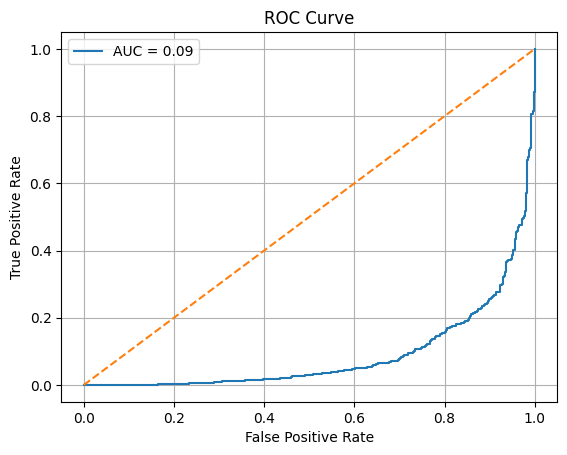

In [36]:
# Plot ROC Curve (for binary classification only)
if len(set(y)) == 2:
    y_binary = y_test.map({y.unique()[0]: 0, y.unique()[1]: 1}).values
    proba = y_proba[:, 1]
    auc = roc_auc_score(y_binary, proba)
    fpr, tpr, _ = roc_curve(y_binary, proba)

    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC curve is only shown for binary classification.")

#Cross-Validation and Time/Memory Utilization

In [37]:
!pip install memory-profiler

In [38]:
import time
from memory_profiler import memory_usage
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [39]:
# Define 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
# Function to wrap training for memory profiling
def train_and_evaluate():
    start_time = time.time()

    ensemble.fit(X_train, y_train)

    scores = cross_val_score(ensemble, X, y, cv=cv, scoring="accuracy")
    duration = time.time() - start_time

    print(f"\nCross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"Training + CV Time: {duration:.2f} seconds")
    return ensemble

In [41]:
# Measure memory usage
mem_usage = memory_usage(train_and_evaluate, max_iterations=1)
print(f"\nPeak Memory Usage: {max(mem_usage):.2f} MiB")


Cross-Validation Accuracy Scores: [0.84496124 0.83893196 0.84396552 0.84224138 0.84051724]
Mean Accuracy: 0.8421 ± 0.0022
Training + CV Time: 34.65 seconds

Peak Memory Usage: 1232.73 MiB
